# Principal Component Analysis for exploratory data analysis

Principal Component Analysis (PCA) is a statistical procedure to convert a high-dimensional dataset of correlated observations into a low-dimensional dataset of linearly uncorrelated variables called principal components. This is represented in the following figure:  
<!-- ![asd](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/1-1.png) -->
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/03/1-1.png" alt="Drawing" style="width: 700px;"/>  
Often, PCA can be thought of as revealing the internal structure of the data in a way that best explains the variance in the data. This means that it tries to find the most informative low-dimensional picture that most closely resembles the high-dimensional observations.


# (1) Intuition: why is PCA useful?
PCA is one of the most widely used tools in computational biology since the big data revolution. Why?  
All data sets contain differences (heterogeneity) between the samples (for example, a WT vs KO experiment), but it is hard to understand what the sources of variation are when looking at a very high-dimensional space, such as transcriptomics data. Therefore, when looking at such data sets there are two things that every computational biologist wants to do, and they are both achieved by PCA:  
* **Identify the main sources of variation**: what are the drivers of the hetereogeneity in the data? Are there technical factors such as batch effects or biological factors such as knock out of an enzyme. Can we disentangle the technical variation from the biological variation?
* **Visualise the samples**: it is practically impossible (and stupid) to look at thousands of dimensions separately, we need smart tools to get meaningful low-dimensional representations of the data.

For example, imagine you have 5 RNA-seq data sets done by different labs where you compare samples of healthy individuals vs drug cancer. As expected, an important source of variation will be technical differences between the labs (batch effects), and another important source of variation will be the biological differences between cancer and healthy lungs. Thus, running a PCA on such data set you would recover the two factors in an intuitive low-dimensional representation, as shown in the following figure:


<img src="https://www.researchgate.net/publication/275070640/figure/fig3/AS:325280011964418@1454564206193/Multidimensional-scaling-MDS-plot-of-the-merged-data-set-with-no-batch-effect-removal.png" alt="Drawing" style="width: 700px;"/>  




# (2) Mathematical background

## (2.1) Overview
Consider a data matrix of N samples $\{\mathbf{x}_1,...,\mathbf{x}_n$}, where $\mathbf{x}_n$ is a vector with dimensionality $D$, corresponding to the number of features. The goal of PCA is to project the data onto a new coordinate system having dimensionality $K<D$, while at the same time maximizing the variance explained by the projected data.

This is achieved by an orthogonal transformation such that the first principal component accounts for as much of the variability in the data as possible. Then, each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. 

The transformation for a given sample $n$ to the $k$ principal component is defined as follows:
$$ \tag{1}
\mathbf{w}_1^{T}\mathbf{x}_n = \mathbf{z}_{1(n)} \\
...\\
\mathbf{w}_k^{T}\mathbf{x}_n = \mathbf{z}_{k(n)}
$$

where $\mathbf{z}_n \in \mathbb{R}^{K}$ is a vector that contains the principal component values for sample $n$ and $\mathbf{w} \in \mathbb{R}^{D}$ contains the loadings (or weights) that relate the high-dimensional space with the low dimensional representation. The weights need to be infered such that the low-dimensional representation captures as much of the heterogeneity as possible from the original dataset. The inference procedure is described in the next section.




## (2.2) Derivation of the principal components

How can we estimate the weights? Recap that our goal is to project our $D$-dimensional data into a $K$ dimensional space such that as much variability as possible (of the original data) is captured using only $K$ variables.
To begin with, consider the projection into a single principal component, so that $K=1$:  

$$
\tag{2}
\mathbf{z}_1 = \mathbf{X} \mathbf{w}_1
$$
The variance of the projected data can be calculated as:  

$$
\tag{3}
\frac{1}{N} \sum_{n=1}^{N} (\mathbf{w}_1^{T} \mathbf{x}_{n} - \mathbf{w}_1^{T} \mathbf{\hat{x}})^2
$$

The aim of the PCA solution is to find the value of the weights $\mathbf{w}$ that maximise the variance explained. Therefore, we can turn this into an optimization problem:

$$
\tag{4}
\mathbf{w}_1 = \text{argmax}_{\mathbf{w} \in \mathbb{R}^D} \sum_{n=1}^{N} (\mathbf{w}^{T} \mathbf{x}_{n} - \mathbf{w}^{T} \mathbf{\hat{x}})^2
$$

**(Q) Maximising this expression does not work without a constraint. Why?**  



Adding the constrain:

$$
\tag{5}
\mathbf{w}_1 = \text{argmax}_{\|\mathbf{w}\|=1} \sum_{n=1}^{N} (\mathbf{w}^{T} \mathbf{x}_{n} - \mathbf{w}^{T} \mathbf{\hat{x}})^2
$$

**Advanced note:** By solving the maximization problem, one can show that the optimal linear projection for which the variance is maximized corresponds to the first $K$ eigenvectors of the covariance matrix of the data, and the variance explained are the corresponding eigenvalues. See Bishop chapter 12 for details.

Once $\mathbf{w}_1$ is identified, then you can easily compute the low-dimensional representation for the first principal component using equation (2).
Subsequently, the $k$th component can be found by subtracting (regressing out) the first $k−1$ principal components from $\mathbf{X}$:

$$
\tag{6}
\hat{\mathbf{x}}_{n}^{k} = \mathbf{x}_{n} - \sum_{s=1}^{k-1} \mathbf{z}_{s} \mathbf{w}_{s}^{T} 
$$
and repeating the procedure above.






# 3. Basic examples

## (3.1) Dummy example
Consider the following data set of 2 variables, one is 
the DJIA index, a stock market index that constitutes some of America’s biggest companies and the other is the S&P 500 index, a similar aggregate of stocks of large American-listed companies, which, as expected, contains many of the companies that the DJIA comprises. Not surprisingly, the DJIA and SP are highly correlated:
<img src="https://coolstatsblog.files.wordpress.com/2015/03/djia-vs-snp2.png" alt="Drawing" style="width: 500px;"/>  

Clearly, a single variable can capture most of the variation in this data set. Thus, if we run PCA with $k=1$ we will obtain the following axis of variation, which accounts for most of the variation (the signal) in the original data set:
<img src="https://coolstatsblog.files.wordpress.com/2015/03/djia-vs-snp-with-line.png" alt="Drawing" style="width: 500px;"/>  



## (3.2) A more complex example in R: iris data set
### (3.2.1) Overview
We are going to use a traditional data set in R which is called "iris". It contains four different measurements (sepal length, sepal width, petal length, petal width) for 150 iris flowers from three different species:
Iris-setosa (n=50)
Iris-versicolor (n=50)
Iris-virginica (n=50)
<img src="https://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png" alt="Drawing" style="width: 600px;"/>  




In [1]:
data(iris)
head(iris, 3)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa

**(Q) Explore the data set by doing pairwise scatterplots between the different features, and try to see if you can separate the three species**
*Note that, in this case, by plotting individual features the separation between species is fairly good and we could obtain a good classifier for predicting the species based on measurements of new specimens. However, each of these plots still shows only a small part of information. To obtain a 2D plot that captures as much information as possible we do PCA*

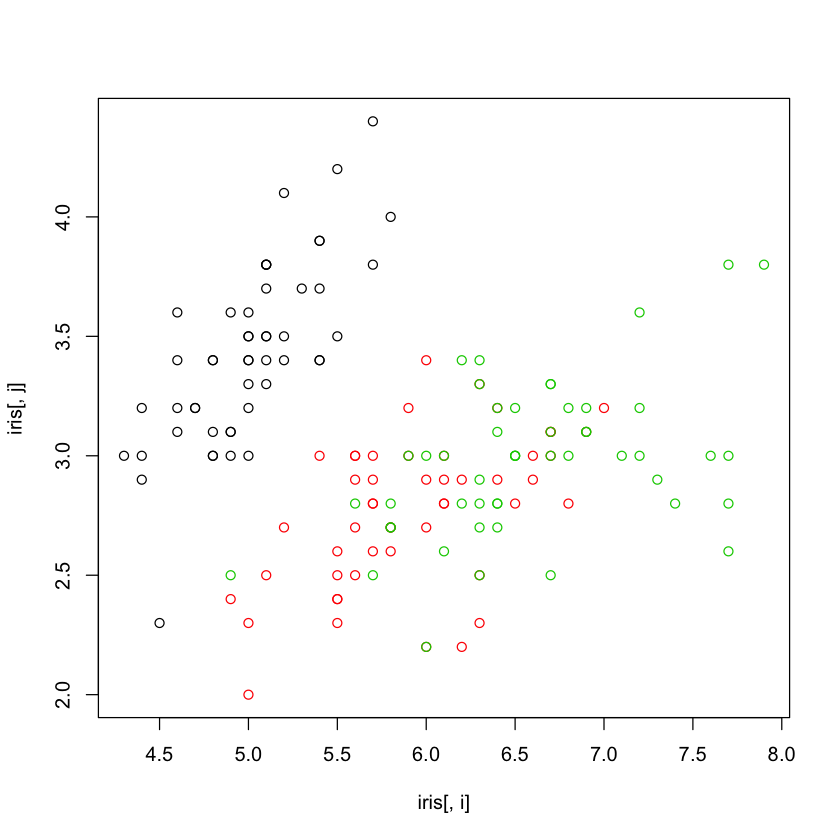

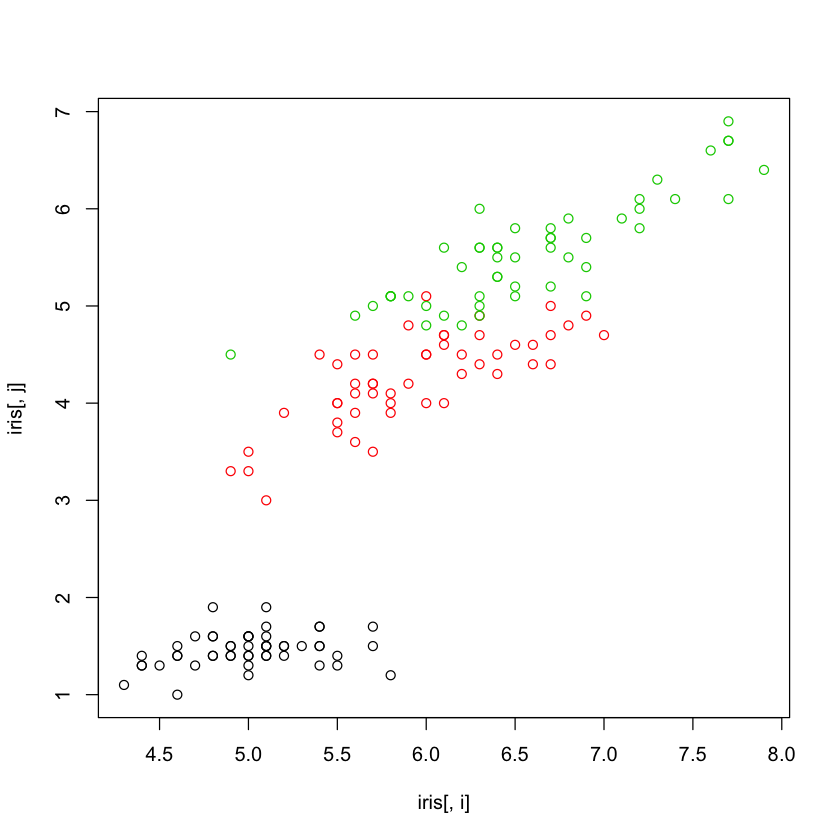

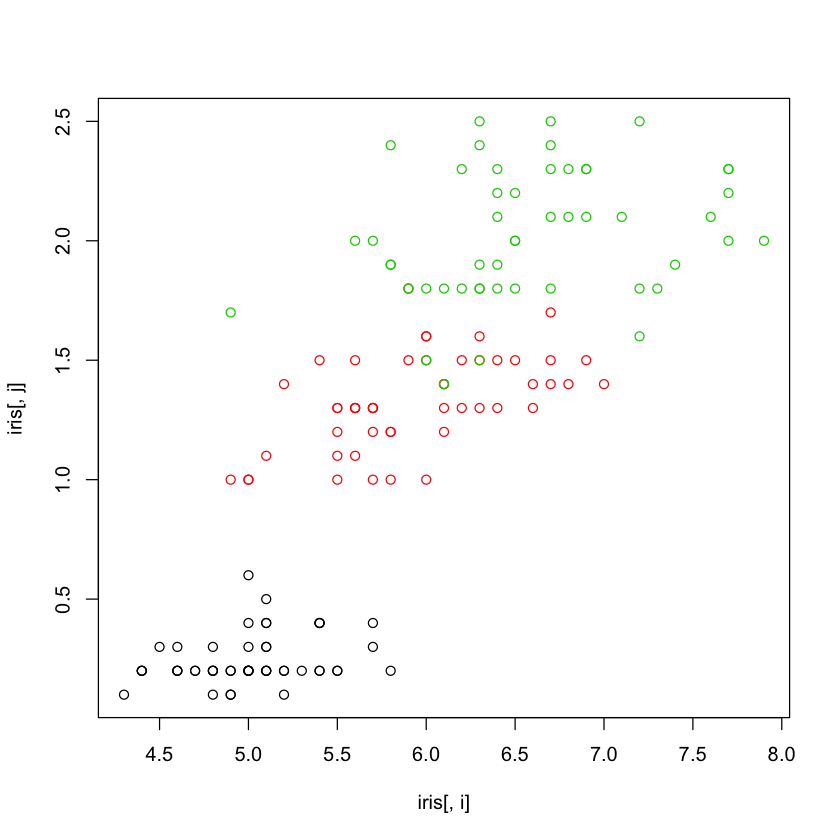

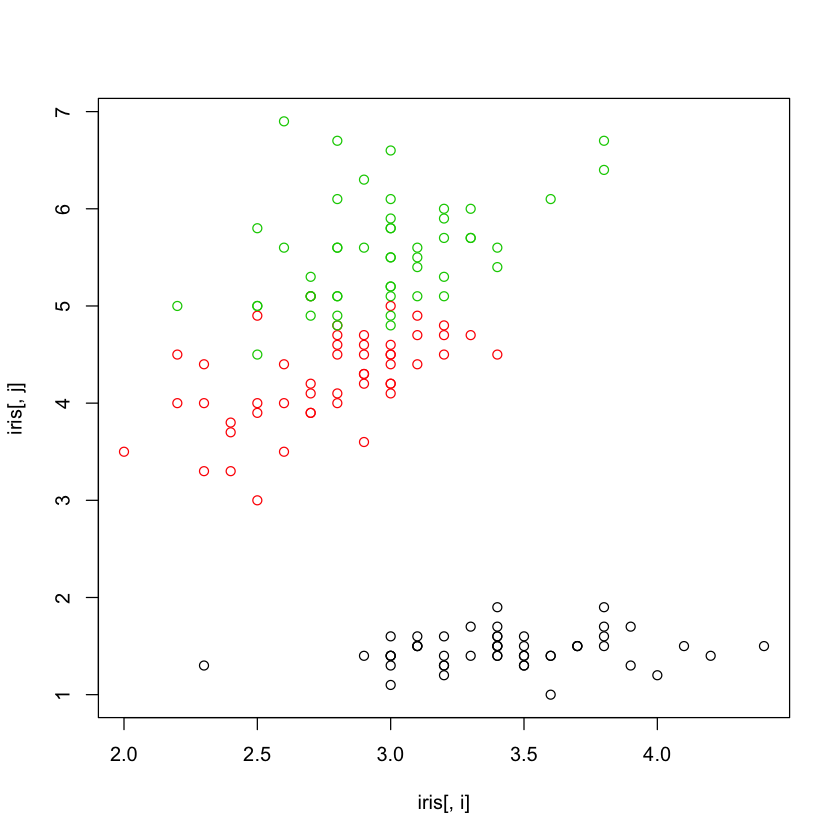

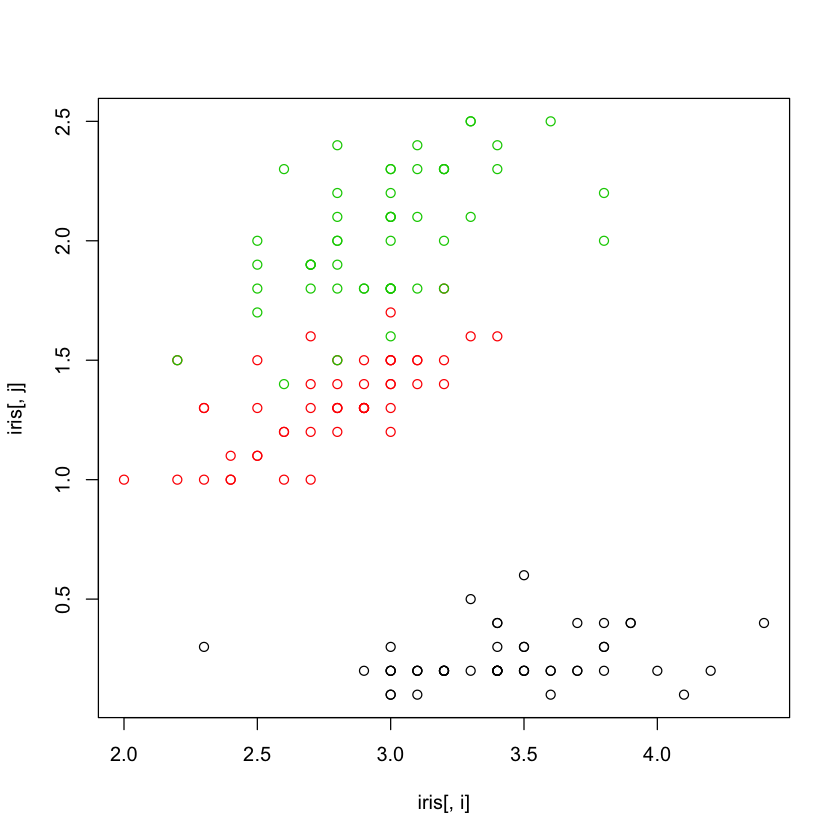

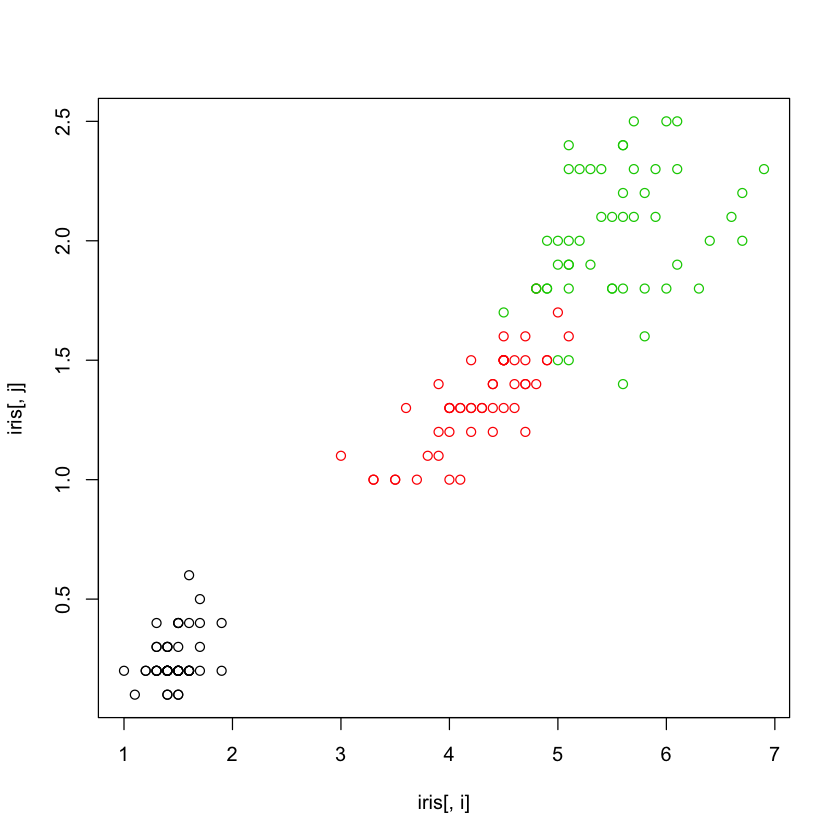

In [14]:
for (i in 1:3) {
    for (j in (i+1):4) {
        plot(iris[,i], iris[,j], col=iris$Species)
    }
}

Note that, in this case, by plotting individual features the separation between species is fairly good and we could obtain a good classifier for predicting the species based on measurements of new specimens. However, each of these plots still shows only a small part of information. To obtain a 2D plot that captures as much information as possible we do PCA.

### (3.2.2) Standarization of the data 
Many machine learning models and algorithms require data to be standarized, usually by centering the features to zero-mean and optionally scaling them to unit variance. Whether and how to standarize your data is not a straight-forward answer and it depends on what your aim is, on what method you are using and what your data looks like.

As a general rule, PCA tries to capture as much variability as possible in the data, so the features with high variability will explain more fraction of the total variance than features with low variability. In some ocasions this is what we want, for example, if we have gene expression data we want the more variable genes (usually the differentialy expressed genes) to contribute more than the genes which are expressed in constant levels (housekeeping genes). 

However, there are cases where some features have more variance because of technical reasons, for example if the scale of the variables is different (centimeters vs meters). In this case, we need to standarise the data to unit variance, otherwise the features in centimetres will have higher scale and will contribute more to the total variance. Regarding feature centering, PCA is invariant to linear transformations of the data, so adding constant terms to the variables do not affect the output. However, it is common practice and always recommended to center the data.



**(Q) Calculate means and variances in the Iris dataset. Subsequently, standarize the data to zero-mean and unit variance (use the 'scale' function).**  

In [15]:
X <- as.matrix(iris[,1:4])

# Print mean and variances in the original data set
print("Mean and variances before scaling")
round(apply(X, 2, mean), 3)
round(apply(X, 2, var), 3)

# Do the scaling, if x is a vector, then you can center and scale it using: (x - mean(x))/sd(x)
iris.std <- scale(X, center = T, scale = T)

# Print mean and variances after scaling
print("Mean and variances after scaling")
round(apply(iris.std,2,mean),3)
round(apply(iris.std,2,var),3)

[1] "Mean and variances before scaling"


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       5.843        3.057        3.758        1.199

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       0.686        0.190        3.116        0.581

[1] "Mean and variances after scaling"


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           0            0            0            0

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1

### (3.2.3) Fit Principal Component Analysis

Use the 'prcomp' command. You can look at the documentation by typing ?prcomp

In [16]:
iris.pca <- prcomp(iris.std, center = TRUE, scale. = TRUE) 
summary(iris.pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

**Exercises**:  
**(1) Plot the fraction of variance explained by each component**  
**(2) Plot the cumulative fraction fo variance explained by each component**  
**(3) Generate a scatterplot of PC1 and PC2 and colour by species **  
**(4) Inspect the loadings (also called the rotation matrix), which features contribute more to the first PC? And to the second? Why some features have different sign? To quantify feature importance should we take the sign into account?**  

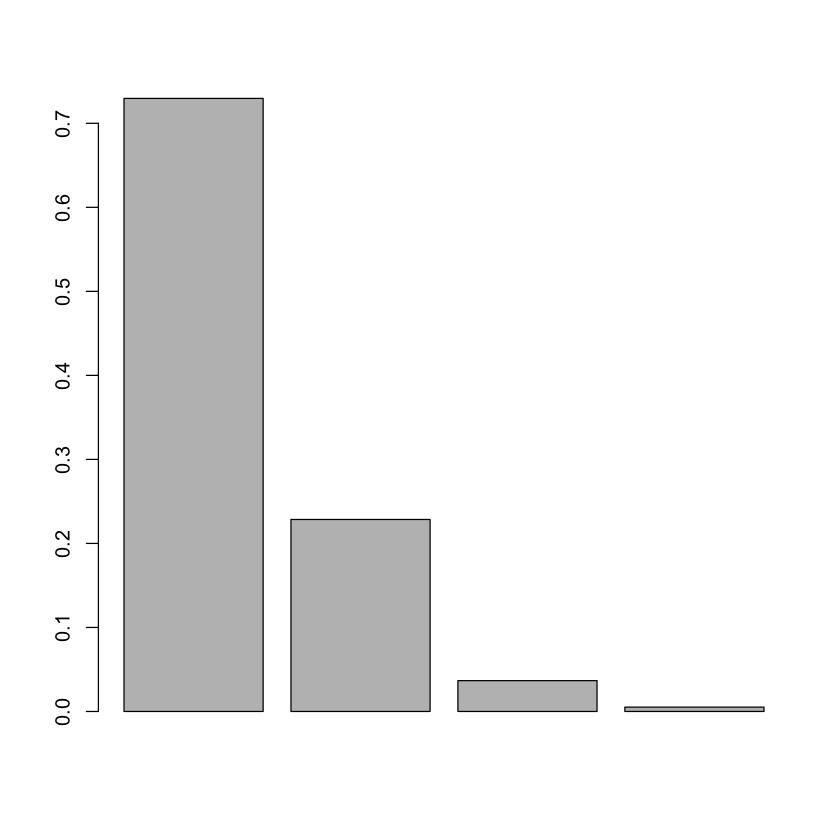

In [18]:
# (1)
barplot((iris.pca$sdev**2)/(sum(iris.pca$sdev**2)))

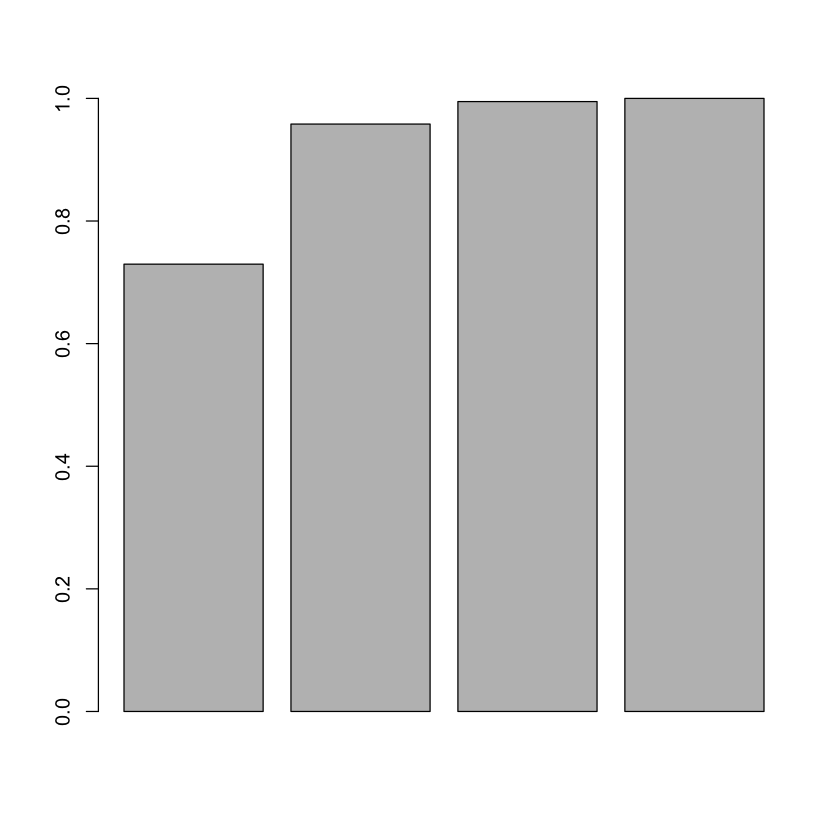

In [19]:
# (2)
cumFrac <- cumsum((iris.pca$sdev**2)/(sum(iris.pca$sdev**2))) 
barplot(cumFrac)



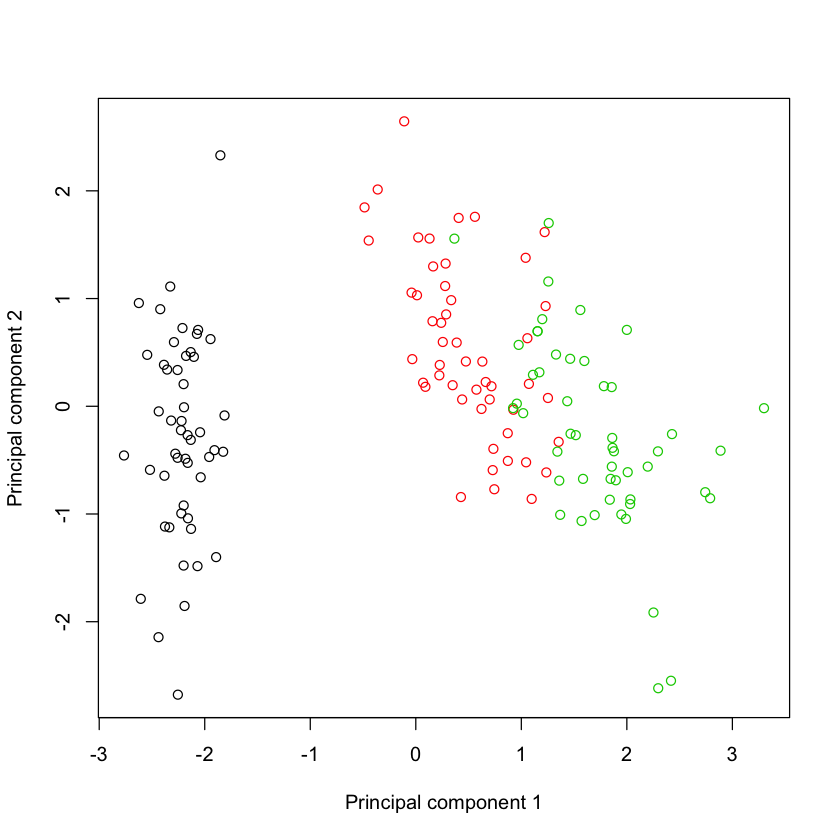

In [78]:
# (3) 
plot(iris.pca$x[,1], iris.pca$x[,2], col=iris$Species, xlab = "Principal component 1", ylab="Principal component 2")

In [79]:
# (4)
# The sign simply reflects the directionality of the effect of the feature. The decomposition done by PCA is Y=WX
# so it is the product of the weights and the principal components that interact with the data. If you change
# the sign of both (or more generally, rotate) the result is still the same. This is called "Rotational invariance of PCA".

# Therefore, different weights imply different directions, for example, if feature A has a positive weight and feature B has a negative weight
# it means that when you move through PC1 A increases whereas B decreases. The magnitude of the weight tells you how strong the effect is.
# That is, how much is this feature correlated with a given PC.

head(iris.pca$rotation[,1])
head(iris.pca$rotation[,2])

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.5210659   -0.2693474    0.5804131    0.5648565

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
 -0.37741762  -0.92329566  -0.02449161  -0.06694199

## (3.3) A real application: single-cell RNA sequencing from HipSci project

The Human Induced Pluripotent Stem Cells Initiative (HipSci) is a project aimed at generating a large, high-quality reference panel of human iPSC lines for the research community. 
These lines are created from tissue donations from both healthy volunteers and patients from particular rared isease communities.  

In particular, the data set we will analyse corresponds to a study where IPSc from multiple donors are differentiated *in vitro* into endoderm cells.


### (3.3.1) Load the gene expression matrix and the sample metadata

In [3]:
data <- read.table("scRNA_hipsci_data.txt", header=T, sep=" ", comment.char="")
sample_metadata <- read.table("scRNA_hipsci_metadata.txt", header=T, sep=" ")

Inspect the data...

[1] 1680 8175

[1] "1" "2" "3" "4" "5" "6"

[1] "ENSG00000000003_TSPAN6"   "ENSG00000000419_DPM1"    
[3] "ENSG00000000457_SCYL3"    "ENSG00000000460_C1orf112"
[5] "ENSG00000001036_FUCA2"    "ENSG00000001084_GCLC"

[1] 1680 8175

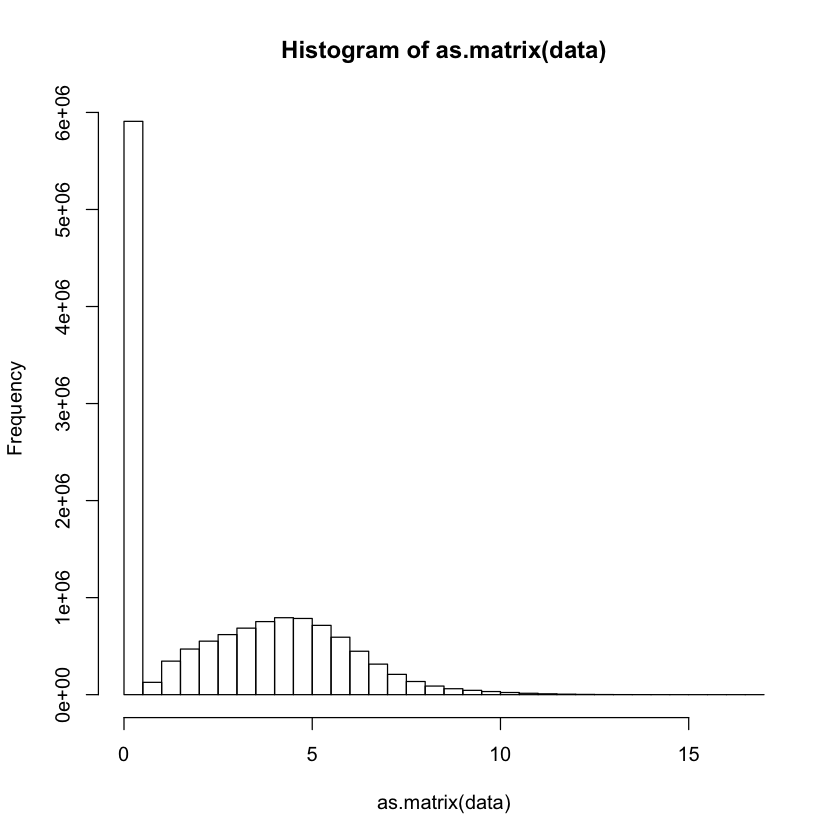

In [4]:
# Dimensionality of the data is (nsamples,ngenes)
dim(data)

# Row names are sample IDs ("1","2","3"...)
head(rownames(data))

# Column names are gene IDs ("ENSG00000000003_TSPAN6","ENSG00000000419_DPM1", ...)
head(colnames(data))

dim(as.matrix(data))
# Plot histogram, notice the zero-inflation characteristic to single-cell data
hist(as.matrix(data))

Inspect the sample metadata...

In [5]:
# Column 1: number of expressed genes (proxy for cell quality)
# Column 2: donor ID
# Column 3: plate ID
# Column 4: day of differentiation
head(sample_metadata)

percent_mapped donor  plate_id day 
1 36.36907       xugn_1 LN50     day1
2 80.78200       xugn_1 LN50     day1
3 50.37378       eika_2 LN50     day1
4 59.11040       bima_1 0273     day1
5 56.28652       oapg_5 0273     day1
6 54.44722       oapg_5 0273     day1

### (3.3.2) Fit Principal Component Analysis

**(Q) Fit a PCA and characterise the first two principal components**  


In [6]:
# First fit the performa the PCA. Don't scale the data. This process might take 1min.


In [11]:
# Print a sumamry of the PCA.


In [20]:
#generate a barplot of the explained fraction of variance


In [10]:
# Calculate the correlations of the first 5 principal components to the number of expressed genes.
# You can use the cor() command.


In [ ]:
# Plot the first two principal components an colour the sample points according according 
# to the Donor, plate ID and third the day. You will have to generate three different plots.
# Use the sample_metadata to for labelling.



## (3.4) Dimensionality reduction: How many PCs to choose?

When PCA is used only for the reduction of dimensionality, the question comes up how many Principal Components to keep. Scree plots, i.e. plotting the eigenvalues against the indices (basically what we did before), can be used in order to look for a "elbow-bending". This heuristic is based on the observation that principal components of uncorrelated variables typically have a constant fall-off.

<!-- ![asd](https://www.ibm.com/support/knowledgecenter/en/SSLVMB_sub/spss/images/images_m-r/out_fac_scree_telco_01.jpg) -->
<img src="https://www.ibm.com/support/knowledgecenter/en/SSLVMB_sub/spss/images/images_m-r/out_fac_scree_telco_01.jpg" alt="Drawing" style="width: 700px;"/>

There exists other rules, e.g.

Kaiser's rule (1960): Keep those PCs with individual variance $>= 1$. However, as one can imagine, a very controversial topic.


# (4) Beyond PCA

PCA is formulated by linear mappings from a high dimensional into a lower dimensional space and is thus not able to capture more complex manifolds. Several more sophisticated algorithms exist. To name just a few:

- Locally linear embedding

- Isomap

- Autoencoder

- Sammon Mapping

- SNE (t-SNE)

and many more.
Especially t-SNE appeared to be very powerful and is able to capture clusters that are hard or impossible to visualize with other algorithms. SNE in general constructs a probability distribution in the high dimensional space and orders the sample points in the low dimensional space in order to match the same distribution. However, the resulting optimization problem for t-SNE is non-convex and the algorithm has additional parameters to be adjusted.
For example see the following comparison on the MNIST dataset: 

<!-- ![asd](https://quantdare.com/wp-content/uploads/2016/07/numeros-673x467.png) -->
<img src="https://quantdare.com/wp-content/uploads/2016/07/numeros-673x467.png" alt="Drawing" style="width: 700px;"/>



